<a href="https://colab.research.google.com/github/cjffcnx/Ai-Lab1-SrijanGajurel/blob/main/ANN-Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementation of ANN Perceptron

Initial weights:
weights[0] = 0.2
weights[1] = 0.2
weights[2] = 0.3

--- Training Perceptron for AND Gate ---
Update -> input: [1 1], target: 1, prediction: 0
Update -> input: [1 1], target: 1, prediction: 0
Update -> input: [1 1], target: 1, prediction: 0
Update -> input: [1 1], target: 1, prediction: 0
Update -> input: [1 1], target: 1, prediction: 0

Final weights after AND training: [np.float64(0.25000000000000006), np.float64(0.25000000000000006), 0.3]

Predictions (Logic Gate):
Input	Expected	Predicted
[0 0]	0		0
[0 1]	0		0
[1 0]	0		0
[1 1]	1		1

--- Training Perceptron for Function Approximation ---
Reinitialized weights: [0.1, 0.6, 0.8]
Epoch 1: input=[0 0], target=0, predicted=1
Epoch 1: input=[0 1], target=0, predicted=1
Epoch 1: input=[1 0], target=0, predicted=1
Epoch 2: input=[0 0], target=0, predicted=1
Epoch 2: input=[0 1], target=0, predicted=1
Epoch 2: input=[1 0], target=0, predicted=1
Epoch 3: input=[0 0], target=0, predicted=1
Epoch 3: input=[0 1], target=0, predict

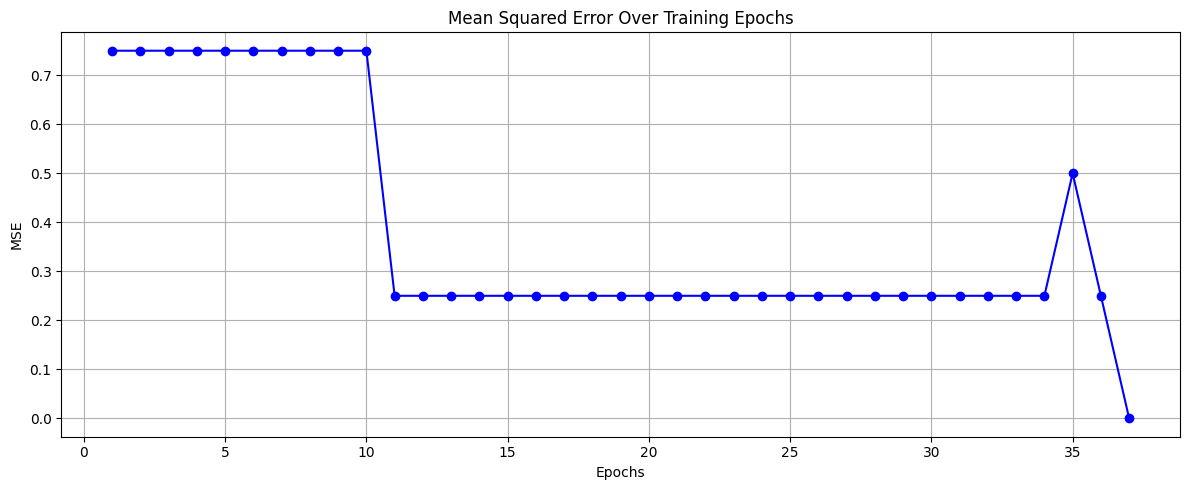

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------------------
# Data: AND logic gate inputs and outputs
# ----------------------------------------
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 0, 0, 1])

# To test with a linear function like y = 2x + 3, uncomment below:
# inputs = np.array([[1], [2], [3], [4], [5]])
# targets = np.array([5, 7, 9, 11, 13])

# ----------------------------------------
# Activation functions
# ----------------------------------------

def step_activation(value, threshold):
    return 1 if value >= threshold else 0

def linear_interpolation(value):
    return round(value)

# ----------------------------------------
# Prediction functions
# ----------------------------------------

def predict_logical(inputs, targets, weights, threshold):
    print("\nPredictions (Logic Gate):")
    print("Input\tExpected\tPredicted")
    for x, target in zip(inputs, targets):
        weighted_sum = np.sum(x * weights[:-1])  # exclude bias
        prediction = step_activation(weighted_sum, threshold)
        print(f"{x}\t{target}\t\t{prediction}")

def predict_function(inputs, targets, weights):
    print("\nPredictions (Function Approximation):")
    print("Input\tExpected\tPredicted")
    for x, target in zip(inputs, targets):
        weighted_sum = np.sum(x * weights[:-1]) + weights[-1]
        prediction = linear_interpolation(weighted_sum)
        print(f"{x}\t{target}\t\t{prediction}")

# ----------------------------------------
# Initial Parameters
# ----------------------------------------

learning_rate = 0.01
threshold = 0.5
weights = []

# Initialize weights randomly (including bias)
for i in range(inputs.shape[1] + 1):
    weights.append(round(np.random.rand(), 1))

print("Initial weights:")
for idx, w in enumerate(weights):
    print(f"weights[{idx}] = {w}")

# ----------------------------------------
# Perceptron Training for Logic Gates (e.g., AND)
# ----------------------------------------

print("\n--- Training Perceptron for AND Gate ---")
training_complete = False

while not training_complete:
    training_complete = True
    for x, target in zip(inputs, targets):
        prediction = step_activation(np.sum(x * weights[:-1]), threshold)
        error = target - prediction

        if error != 0:
            training_complete = False
            for i in range(len(x)):
                weights[i] += learning_rate * x[i] * error
            # bias not updated for logic gate here
            print(f"Update -> input: {x}, target: {target}, prediction: {prediction}")

print("\nFinal weights after AND training:", weights)
predict_logical(inputs, targets, weights, threshold)

# ----------------------------------------
# Reinitialize weights for y = 2x + 3 approximation
# ----------------------------------------

weights = [round(np.random.rand(), 1) for _ in range(inputs.shape[1] + 1)]

print("\n--- Training Perceptron for Function Approximation ---")
print("Reinitialized weights:", weights)

mse_history = []
epoch_list = []
epoch = 0
training_complete = False

while not training_complete:
    epoch += 1
    training_complete = True
    squared_errors = []

    for x, target in zip(inputs, targets):
        prediction = linear_interpolation(np.sum(x * weights[:-1]) + weights[-1])
        error = target - prediction
        squared_errors.append(error ** 2)

        if error != 0:
            training_complete = False
            for i in range(len(x)):
                weights[i] += learning_rate * x[i] * error
            weights[-1] += learning_rate * error  # update bias
            print(f"Epoch {epoch}: input={x}, target={target}, predicted={prediction}")

    mse = np.mean(squared_errors)
    mse_history.append(mse)
    epoch_list.append(epoch)

print("\nFinal weights after function training:", weights)
predict_function(inputs, targets, weights)

# ----------------------------------------
# Plot MSE vs. Epochs
# ----------------------------------------

plt.figure(figsize=(12, 5))
plt.plot(epoch_list, mse_history, marker='o', color='blue')
plt.title("Mean Squared Error Over Training Epochs")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.grid(True)
plt.tight_layout()
plt.show()
